In [2]:
import time
import tensorflow as tf
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import numpy as np
from numpy import newaxis
import matplotlib.pyplot as plt

Using TensorFlow backend.


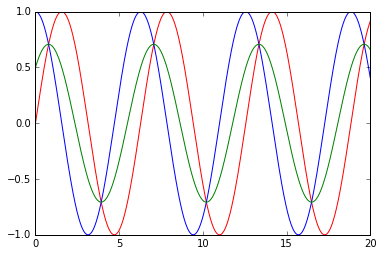

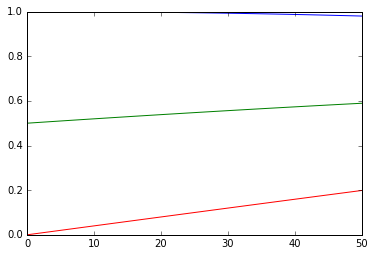

(4949, 51)
(4949, 51, 2)
(1, 51)
(1, 51)
(1, 1, 51)


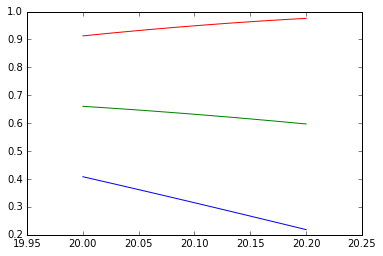

(1, 51, 2)


In [14]:
def sin(t):
    return np.sin(t)

def cos(t):
    return np.cos(t)

# 0 to 20 for multiple periods
t = np.linspace(0, 20, 5000)

sin_wave = sin(t)
cos_wave = cos(t)
avg_wave = 0.5 * (sin_wave + cos_wave)
    
plt.cla()
plt.plot(t, sin_wave, "r-")
plt.plot(t, cos_wave, "b-")
plt.plot(t, avg_wave, "g-")
plt.show()


seq_len = 50
sequence_length = seq_len + 1
x_train_sin = []
x_train_cos = []
y_train = []
for index in range(len(sin_wave) - sequence_length):
    x_train_sin.append(sin_wave[index: index + sequence_length])
    x_train_cos.append(cos_wave[index: index + sequence_length])
    y_train.append(avg_wave[index: index + sequence_length])

x_train_sin = np.array(x_train_sin)
x_train_cos = np.array(x_train_cos)
y_train = np.array(y_train)

# len(x_train_sin) = len(x_train_cos) = len(y_train) = 4949
# len(x_train_sin[0]) = len(x_train_cos[0]) = len(y_train[0]) = 51

t_two = np.linspace(0, 50, 51)

plt.cla()
plt.plot(t_two, x_train_sin[0], "r-")
plt.plot(t_two, x_train_cos[0], "b-")
plt.plot(t_two, y_train[0], "g-")
plt.show()

# x_train_sin = np.reshape(x_train_sin, (x_train_sin.shape[0], x_train_sin.shape[1], 1))
# x_train_cos = np.reshape(x_train_cos, (x_train_cos.shape[0], x_train_cos.shape[1], 1))

print(x_train_sin.shape)
x_train_sin = np.expand_dims(x_train_sin, axis=-1)
x_train_cos = np.expand_dims(x_train_cos, axis=-1)
x_train = np.concatenate((x_train_sin, x_train_cos), axis=-1)
print(x_train.shape)

# Generating test data
t_three = np.linspace(20, 40, 5000)
t_three = t_three[0:51]

x_test_sin = []
x_test_cos = []
y_test = []

x_test_sin.append(sin(t_three))
x_test_sin = np.array(x_test_sin)
x_test_cos.append(cos(t_three))
x_test_cos = np.array(x_test_cos)
y_test.append(0.5 * (x_test_sin + x_test_cos))
y_test = np.array(y_test)

print(x_test_sin.shape)
print(x_test_cos.shape)
print(y_test.shape)

sin = np.squeeze(x_test_sin)
cos = np.squeeze(x_test_cos)
avg = np.squeeze(y_test)

plt.cla()
plt.plot(t_three, sin, "r-")
plt.plot(t_three, cos, "b-")
plt.plot(t_three, avg, "g-")
plt.show()

x_test_sin = np.expand_dims(x_test_sin, axis=-1)
x_test_cos = np.expand_dims(x_test_cos, axis=-1)
x_test = np.concatenate((x_test_sin, x_test_cos), axis=-1)
print(x_test.shape)


In [6]:
def build_model(layers):
    
    model = Sequential()
    
    model.add(LSTM(
        input_dim = layers[0],
        output_dim = layers[1],
        return_sequences = True))
    model.add(Dropout(0.2))
    
    model.add(LSTM(
        layers[2],
        return_sequences = False))
    model.add(Dropout(0.2))
    
    model.add(Dense(
        output_dim = layers[3]))
    model.add(Activation("linear"))
    
    model.compile(loss="mse", optimizer="rmsprop")
    
    # try changing whether there is dropout, activation function, loss function, number of layers, in/out of layers
    
    return model

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:8: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(units=500, return_sequences=True, input_shape=(None, 2))`
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=51)`


Train on 4454 samples, validate on 495 samples
Epoch 1/500
4454/4454 [==============================] - 7s 2ms/step - loss: 0.4416 - val_loss: 0.0488
Epoch 2/500
4454/4454 [==============================] - 2s 449us/step - loss: 0.0477 - val_loss: 0.0259
Epoch 3/500
4454/4454 [==============================] - 2s 443us/step - loss: 0.0289 - val_loss: 0.0182
Epoch 4/500
4454/4454 [==============================] - 2s 471us/step - loss: 0.0254 - val_loss: 0.0254
Epoch 5/500
4454/4454 [==============================] - 2s 435us/step - loss: 0.0240 - val_loss: 0.0190
Epoch 6/500
4454/4454 [==============================] - 2s 438us/step - loss: 0.0208 - val_loss: 0.0153
Epoch 7/500
4454/4454 [==============================] - 2s 454us/step - loss: 0.0209 - val_loss: 0.0112
Epoch 8/500
4454/4454 [==============================] - 2s 436us/step - loss: 0.0149 - val_loss: 0.0187
Epoch 9/500
4454/4454 [==============================] - 2s 435us/step - loss: 0.0200 - val_loss: 0.0095
Epoch 10/5

4454/4454 [==============================] - 2s 442us/step - loss: 0.0033 - val_loss: 4.5310e-04
Epoch 78/500
4454/4454 [==============================] - 2s 415us/step - loss: 0.0019 - val_loss: 0.0017
Epoch 79/500
4454/4454 [==============================] - 2s 428us/step - loss: 0.0026 - val_loss: 0.0023
Epoch 80/500
4454/4454 [==============================] - 2s 467us/step - loss: 0.0022 - val_loss: 6.6568e-04
Epoch 81/500
4454/4454 [==============================] - 2s 449us/step - loss: 0.0028 - val_loss: 7.3755e-04
Epoch 82/500
4454/4454 [==============================] - 2s 432us/step - loss: 0.0020 - val_loss: 0.0020
Epoch 83/500
4454/4454 [==============================] - 2s 419us/step - loss: 0.0025 - val_loss: 0.0021
Epoch 84/500
4454/4454 [==============================] - 2s 437us/step - loss: 0.0024 - val_loss: 6.2329e-04
Epoch 85/500
4454/4454 [==============================] - 2s 441us/step - loss: 0.0024 - val_loss: 0.0015
Epoch 86/500
4454/4454 [===================

4454/4454 [==============================] - 2s 434us/step - loss: 0.0013 - val_loss: 3.1524e-04
Epoch 153/500
4454/4454 [==============================] - 2s 439us/step - loss: 0.0012 - val_loss: 0.0014
Epoch 154/500
4454/4454 [==============================] - 2s 427us/step - loss: 0.0012 - val_loss: 3.3971e-04
Epoch 155/500
4454/4454 [==============================] - 2s 420us/step - loss: 0.0011 - val_loss: 6.3989e-04
Epoch 156/500
4454/4454 [==============================] - 2s 437us/step - loss: 0.0013 - val_loss: 2.4051e-04
Epoch 157/500
4454/4454 [==============================] - 2s 454us/step - loss: 0.0011 - val_loss: 0.0019
Epoch 158/500
4454/4454 [==============================] - 2s 419us/step - loss: 0.0013 - val_loss: 5.5638e-04
Epoch 159/500
4454/4454 [==============================] - 2s 413us/step - loss: 0.0012 - val_loss: 6.8327e-04
Epoch 160/500
4454/4454 [==============================] - 2s 434us/step - loss: 0.0012 - val_loss: 2.4917e-04
Epoch 161/500
4454/4454

4454/4454 [==============================] - 2s 425us/step - loss: 6.6480e-04 - val_loss: 7.3298e-04
Epoch 226/500
4454/4454 [==============================] - 2s 421us/step - loss: 8.6955e-04 - val_loss: 0.0010
Epoch 227/500
4454/4454 [==============================] - 2s 447us/step - loss: 8.6328e-04 - val_loss: 1.0034e-04
Epoch 228/500
4454/4454 [==============================] - 2s 467us/step - loss: 7.8626e-04 - val_loss: 0.0011
Epoch 229/500
4454/4454 [==============================] - 2s 432us/step - loss: 6.8313e-04 - val_loss: 2.5293e-04
Epoch 230/500
4454/4454 [==============================] - 2s 440us/step - loss: 9.9928e-04 - val_loss: 5.0231e-04
Epoch 231/500
4454/4454 [==============================] - 2s 453us/step - loss: 6.5343e-04 - val_loss: 1.7482e-04
Epoch 232/500
4454/4454 [==============================] - 2s 435us/step - loss: 9.1251e-04 - val_loss: 5.7624e-04
Epoch 233/500
4454/4454 [==============================] - 2s 475us/step - loss: 7.6174e-04 - val_loss

4454/4454 [==============================] - 2s 438us/step - loss: 6.8801e-04 - val_loss: 6.0903e-04
Epoch 297/500
4454/4454 [==============================] - 2s 443us/step - loss: 5.6885e-04 - val_loss: 1.7464e-04
Epoch 298/500
4454/4454 [==============================] - 2s 453us/step - loss: 6.7082e-04 - val_loss: 3.8011e-04
Epoch 299/500
4454/4454 [==============================] - 2s 431us/step - loss: 6.7501e-04 - val_loss: 1.4376e-04
Epoch 300/500
4454/4454 [==============================] - 2s 413us/step - loss: 5.3193e-04 - val_loss: 3.6813e-04
Epoch 301/500
4454/4454 [==============================] - 2s 431us/step - loss: 7.0261e-04 - val_loss: 5.6990e-05
Epoch 302/500
4454/4454 [==============================] - 2s 425us/step - loss: 6.7539e-04 - val_loss: 5.8091e-05
Epoch 303/500
4454/4454 [==============================] - 2s 442us/step - loss: 5.1469e-04 - val_loss: 2.8303e-04
Epoch 304/500
4454/4454 [==============================] - 2s 457us/step - loss: 7.4864e-04 - 

4454/4454 [==============================] - 2s 431us/step - loss: 5.3507e-04 - val_loss: 2.7368e-04
Epoch 368/500
4454/4454 [==============================] - 2s 457us/step - loss: 4.6000e-04 - val_loss: 1.0603e-04
Epoch 369/500
4454/4454 [==============================] - 2s 452us/step - loss: 5.5385e-04 - val_loss: 1.1935e-04
Epoch 370/500
4454/4454 [==============================] - 2s 443us/step - loss: 6.4240e-04 - val_loss: 3.9567e-04
Epoch 371/500
4454/4454 [==============================] - 2s 426us/step - loss: 4.5637e-04 - val_loss: 2.1773e-04
Epoch 372/500
4454/4454 [==============================] - 2s 448us/step - loss: 4.8565e-04 - val_loss: 1.7135e-04
Epoch 373/500
4454/4454 [==============================] - 2s 450us/step - loss: 5.7847e-04 - val_loss: 3.7763e-04
Epoch 374/500
4454/4454 [==============================] - 2s 490us/step - loss: 5.3435e-04 - val_loss: 1.0888e-04
Epoch 375/500
4454/4454 [==============================] - 2s 450us/step - loss: 5.0674e-04 - 

4454/4454 [==============================] - 2s 474us/step - loss: 4.6840e-04 - val_loss: 4.4985e-05
Epoch 439/500
4454/4454 [==============================] - 2s 438us/step - loss: 5.1566e-04 - val_loss: 6.3811e-04
Epoch 440/500
4454/4454 [==============================] - 2s 433us/step - loss: 4.3678e-04 - val_loss: 1.0130e-04
Epoch 441/500
4454/4454 [==============================] - 2s 440us/step - loss: 5.1590e-04 - val_loss: 1.0396e-04
Epoch 442/500
4454/4454 [==============================] - 2s 440us/step - loss: 4.4679e-04 - val_loss: 3.4296e-04
Epoch 443/500
4454/4454 [==============================] - 2s 449us/step - loss: 4.5595e-04 - val_loss: 1.6656e-04
Epoch 444/500
4454/4454 [==============================] - 2s 486us/step - loss: 4.3542e-04 - val_loss: 1.0262e-04
Epoch 445/500
4454/4454 [==============================] - 2s 425us/step - loss: 4.9845e-04 - val_loss: 2.2011e-04
Epoch 446/500
4454/4454 [==============================] - 2s 436us/step - loss: 4.6668e-04 - 

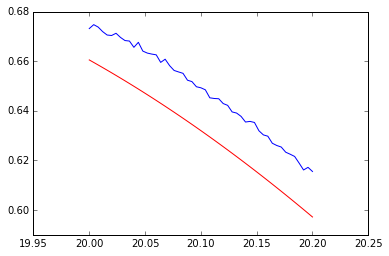

In [18]:
epochs = 500

model = build_model([2, 500, 500, 51])

model.fit(x_train,
          y_train,
          batch_size=512,
          nb_epoch=epochs,
          validation_split=0.1)

predicted = model.predict(x_test)

y_test_new = np.squeeze(y_test)
y_predicted = np.squeeze(predicted)
plt.plot(t_three, y_test_new, "r-")
plt.plot(t_three, y_predicted, "b-")